# Crime Rates Data Analysis


**Name Surname:** Bora Karaçalı

**Student Number:** 090220759

**E-mail:** karacali22@itu.edu.tr

In [61]:
# Required Libraries

import pandas as pd
import numpy as np
import warnings
import statsmodels.api as sm
import networkx as nx
warnings.filterwarnings(action = 'ignore')

# Visualizing

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Modelling

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, mean_squared_error, r2_score, f1_score
from sklearn.preprocessing import StandardScaler

## Importing Data

### Socioeconomic Datasets



In [4]:
states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut",
          "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa",
          "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan",
          "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire",
          "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma",
          "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee",
          "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

In [5]:
poverty_df = pd.read_excel('https://www.ers.usda.gov/webdocs/DataFiles/48747/PovertyEstimates.xlsx?v=1585.3', skiprows=4)
poverty_df

,FIPS_Code,Stabr,Area_name,Rural-urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_ 2013,POVALL_2021,CI90LBALL_2021,CI90UBALL_2021,...,CI90UB517P_2021,MEDHHINC_2021,CI90LBINC_2021,CI90UBINC_2021,POV04_2021,CI90LB04_2021,CI90UB04_2021,PCTPOV04_2021,CI90LB04P_2021,CI90UB04P_2021
0,0,US,United States,NaN,NaN,NaN,NaN,41393176.0,41149497.0,41636855.0,...,16.3,69717.0,69583.0,69851.0,3349149.0,3299669.0,3398629.0,18.3,18.0,18.6
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,800848.0,782169.0,819527.0,...,22.5,53990.0,53218.0,54762.0,71220.0,66888.0,75552.0,25.1,23.6,26.6
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6296.0,4772.0,7820.0,...,20.4,66444.0,60061.0,72827.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,25526.0,21599.0,29453.0,...,18.5,65658.0,60723.0,70593.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,5089.0,3773.0,6405.0,...,44.6,38649.0,34308.0,42990.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,WY,Sweetwater County,5.0,8.0,5.0,8.0,3761.0,3048.0,4474.0,...,11.5,74677.0,66928.0,82426.0,NaN,NaN,NaN,NaN,NaN,NaN
3191,56039,WY,Teton County,7.0,8.0,7.0,8.0,1392.0,1070.0,1714.0,...,6.4,102709.0,90132.0,115286.0,NaN,NaN,NaN,NaN,NaN,NaN
3192,56041,WY,Uinta County,7.0,8.0,7.0,8.0,1917.0,1457.0,2377.0,...,12.9,70162.0,62206.0,78118.0,NaN,NaN,NaN,NaN,NaN,NaN
3193,56043,WY,Washakie County,7.0,11.0,7.0,11.0,773.0,579.0,967.0,...,15.6,62176.0,55415.0,68937.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
poverty_df = poverty_df[poverty_df['Area_name'].isin(states)]
poverty_df = poverty_df[['Area_name', 'POVALL_2021', 'POV017_2021', 'POV517_2021', 'MEDHHINC_2021', 'POV04_2021']]
poverty_df.columns = ['State', 'Estimate_People_All_Ages_Poverty_2021', 
                      'Estimate_People_Age_0_17_Poverty_2021', 
                      'Estimate_Children_Age_5_17_Families_Poverty_2021', 
                      'Estimate_Median_Household_Income_2021', 
                      'Estimate_Children_Age_0_4_Poverty_2021']
poverty_df

,State,Estimate_People_All_Ages_Poverty_2021,Estimate_People_Age_0_17_Poverty_2021,Estimate_Children_Age_5_17_Families_Poverty_2021,Estimate_Median_Household_Income_2021,Estimate_Children_Age_0_4_Poverty_2021
1,Alabama,800848.0,250327.0,176596.0,53990.0,71220.0
69,Alaska,77736.0,23760.0,16316.0,78437.0,6633.0
100,Arizona,919680.0,281696.0,197841.0,68967.0,76649.0
116,Arkansas,471195.0,150353.0,102718.0,52577.0,45096.0
192,California,4742405.0,1362903.0,993484.0,84831.0,339169.0
251,Colorado,554126.0,144163.0,99663.0,82228.0,39308.0
316,Connecticut,355861.0,93263.0,66642.0,83628.0,24150.0
325,Delaware,113026.0,33302.0,23013.0,71636.0,9694.0
331,Florida,2830813.0,774679.0,545090.0,63054.0,212346.0
399,Georgia,1493837.0,508616.0,364720.0,66507.0,135538.0


In [7]:
unemployment_df = pd.read_excel('https://www.ers.usda.gov/webdocs/DataFiles/48747/Unemployment.xlsx?v=1939.6', skiprows=4)
unemployment_df.head

<bound method NDFrame.head of       FIPS_Code State                Area_Name  \
0             0    US            United States   
1          1000    AL                  Alabama   
2          1001    AL       Autauga County, AL   
3          1003    AL       Baldwin County, AL   
4          1005    AL       Barbour County, AL   
...         ...   ...                      ...   
3272      72145    PR  Vega Baja Municipio, PR   
3273      72147    PR    Vieques Municipio, PR   
3274      72149    PR   Villalba Municipio, PR   
3275      72151    PR    Yabucoa Municipio, PR   
3276      72153    PR      Yauco Municipio, PR   

      Rural_Urban_Continuum_Code_2013  Urban_Influence_Code_2013  Metro_2013  \
0                                 NaN                        NaN         NaN   
1                                 NaN                        NaN         NaN   
2                                 2.0                        2.0         1.0   
3                                 3.0            

In [8]:
unemployment_df = unemployment_df[unemployment_df['Area_Name'].isin(states)]
unemployment_df = unemployment_df[['Area_Name', 'Civilian_labor_force_2022', 'Employed_2022', 'Unemployed_2022', 'Unemployment_rate_2022']]


unemployment_df.columns = ['State', 'Civilian_Labor_Force_Annual_Avg_2022', 
                           'Number_Employed_Annual_Avg_2022', 
                           'Number_Unemployed_Annual_Avg_2022', 
                           'Unemployment_Rate_2022']
unemployment_df

,State,Civilian_Labor_Force_Annual_Avg_2022,Number_Employed_Annual_Avg_2022,Number_Unemployed_Annual_Avg_2022,Unemployment_Rate_2022
1,Alabama,2286028.0,2226670.0,59358.0,2.6
69,Alaska,356799.0,342400.0,14399.0,4.0
104,Arizona,3615161.0,3477033.0,138128.0,3.8
120,Arkansas,1369367.0,1323949.0,45418.0,3.3
196,California,19251974.0,18440895.0,811079.0,4.2
255,Colorado,3200625.0,3103531.0,97094.0,3.0
320,Connecticut,1932463.0,1851993.0,80470.0,4.2
329,Delaware,496688.0,474258.0,22430.0,4.5
335,Florida,10762307.0,10449041.0,313266.0,2.9
403,Georgia,5234275.0,5075093.0,159182.0,3.0


In [9]:
education_df = pd.read_excel('https://www.ers.usda.gov/webdocs/DataFiles/48747/Education.xlsx?v=1939.6', skiprows=3)
education_df

,Federal Information Processing Standard (FIPS) Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2008-12","Percent of adults with a bachelor's degree or higher, 2008-12","Less than a high school diploma, 2017-21","High school diploma only, 2017-21","Some college or associate's degree, 2017-21","Bachelor's degree or higher, 2017-21","Percent of adults with less than a high school diploma, 2017-21","Percent of adults with a high school diploma only, 2017-21","Percent of adults completing some college or associate's degree, 2017-21","Percent of adults with a bachelor's degree or higher, 2017-21"
0,0,US,United States,NaN,NaN,NaN,NaN,52373312.0,34158051.0,11650730.0,...,28.993579,28.484955,25050356.0,59636386.0,64656741.0,75808834.0,11.125960,26.487130,28.716889,33.670022
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,1062306.0,468269.0,136287.0,...,29.022866,22.264896,430047.0,1041209.0,1032122.0,910425.0,12.597300,30.499973,30.233789,26.668938
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,29.618142,21.707831,4126.0,12977.0,11367.0,11144.0,10.415510,32.758621,28.694401,28.131469
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,18726.0,8426.0,2334.0,...,31.819503,27.741591,14555.0,44342.0,50518.0,52562.0,8.985844,27.375492,31.188379,32.450286
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,...,25.771784,14.524286,4378.0,6600.0,5010.0,2007.0,24.328980,36.676855,27.841067,11.153098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,72145,PR,Vega Baja Municipio,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,23.959976,17.584094,9466.0,11932.0,9246.0,8988.0,23.884740,30.106984,23.329633,22.678644
3281,72147,PR,Vieques Municipio,7.0,12.0,7.0,12.0,NaN,NaN,NaN,...,15.886045,10.140029,1613.0,2872.0,640.0,845.0,27.018425,48.107203,10.720268,14.154104
3282,72149,PR,Villalba Municipio,2.0,2.0,2.0,2.0,NaN,NaN,NaN,...,14.340816,15.207082,3329.0,5469.0,3392.0,3333.0,21.445597,35.231592,21.851446,21.471365
3283,72151,PR,Yabucoa Municipio,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,19.986177,12.912144,6097.0,6011.0,6631.0,3951.0,26.870868,26.491847,29.224328,17.412957


In [10]:
education_df = education_df[education_df['Area name'].isin(states)]

education_df = education_df[['Area name', 
                             'Less than a high school diploma, 2017-21',
                             'High school diploma only, 2017-21',
                             "Some college or associate's degree, 2017-21",
                             "Bachelor's degree or higher, 2017-21",
                             'Percent of adults with less than a high school diploma, 2017-21',
                             'Percent of adults with a high school diploma only, 2017-21',
                             "Percent of adults completing some college or associate's degree, 2017-21",
                             "Percent of adults with a bachelor's degree or higher, 2017-21"]]


education_df.columns = ['State', 
                        'Less_than_High_School_Diploma_2017_21',
                        'High_School_Diploma_Only_2017_21',
                        'Some_College_or_Associates_Degree_2017_21',
                        'Bachelors_Degree_or_Higher_2017_21',
                        'Percent_Less_than_High_School_Diploma_2017_21',
                        'Percent_High_School_Diploma_Only_2017_21',
                        'Percent_Some_College_or_Associates_Degree_2017_21',
                        'Percent_Bachelors_Degree_or_Higher_2017_21']
education_df

,State,Less_than_High_School_Diploma_2017_21,High_School_Diploma_Only_2017_21,Some_College_or_Associates_Degree_2017_21,Bachelors_Degree_or_Higher_2017_21,Percent_Less_than_High_School_Diploma_2017_21,Percent_High_School_Diploma_Only_2017_21,Percent_Some_College_or_Associates_Degree_2017_21,Percent_Bachelors_Degree_or_Higher_2017_21
1,Alabama,430047.0,1041209.0,1032122.0,910425.0,12.597300,30.499973,30.233789,26.668938
69,Alaska,32669.0,137873.0,165649.0,148191.0,6.744470,28.463692,34.198009,30.593829
108,Arizona,560460.0,1125498.0,1610633.0,1495416.0,11.695726,23.486986,33.610823,31.206465
124,Arkansas,248721.0,688732.0,592568.0,491269.0,12.305063,34.073884,29.316328,24.304726
200,California,4236035.0,5477154.0,7632443.0,9451438.0,15.807829,20.439376,28.482379,35.270416
259,Colorado,300620.0,810976.0,1139275.0,1686169.0,7.635686,20.598622,28.937349,42.828343
324,Connecticut,225021.0,656949.0,613201.0,1019966.0,8.946670,26.119810,24.380421,40.553099
333,Delaware,61788.0,209928.0,186528.0,232374.0,8.946769,30.397123,27.008853,33.647255
339,Florida,1682505.0,4282929.0,4543900.0,4839956.0,10.961452,27.903108,29.603324,31.532116
407,Georgia,831989.0,1925348.0,1983294.0,2335225.0,11.758139,27.210107,28.029033,33.002721


## Crime Datasets

### The dataset comprises crime statistics for each of the 50 states in the USA for 2022. The data is categorized into three main types of crimes:

### Crime Against Persons, Crime Against Property and Crime Against Society.

In [11]:
persons_file_path = '~/Desktop/state/Crimes_Against_Persons_Offenses_Offense_Category_by_State_2022.xlsx'
property_file_path = '~/Desktop/state/Crimes_Against_Property_Offenses_Offense_Category_by_State_2022.xlsx'
society_file_path = '~/Desktop/state/Crimes_Against_Society_Offenses_Offense_Category_by_State_2022.xlsx'


persons_df = pd.read_excel(persons_file_path, sheet_name=None)
property_df = pd.read_excel(property_file_path, sheet_name=None)
society_df = pd.read_excel(society_file_path, sheet_name=None)


print("Persons Dataset Sheets:", persons_df.keys())
print("Property Dataset Sheets:", property_df.keys())
print("Society Dataset Sheets:", society_df.keys())


for sheet in persons_df:
    print(f"Persons Dataset - {sheet}:\n", persons_df[sheet].head(), "\n")

for sheet in property_df:
    print(f"Property Dataset - {sheet}:\n", property_df[sheet].head(), "\n")

for sheet in society_df:
    print(f"Society Dataset - {sheet}:\n", society_df[sheet].head(), "\n")



Persons Dataset Sheets: dict_keys(['Table 27 NIBRS 2022'])
Property Dataset Sheets: dict_keys(['Table 28 NIBRS 2022'])
Society Dataset Sheets: dict_keys(['Table 29 NIBRS 2022'])
Persons Dataset - Table 27 NIBRS 2022:
   Crimes Against Persons Offenses                           Unnamed: 1  \
0                Offense Category                                  NaN   
1                  by State, 2022                                  NaN   
2                           State  Number of \nParticipating\nAgencies   
3                             NaN                                  NaN   
4                           Total                                13293   

            Unnamed: 2        Unnamed: 3         Unnamed: 4  \
0                  NaN               NaN                NaN   
1                  NaN               NaN                NaN   
2  Population\nCovered  Total \nOffenses   Offense Category   
3                  NaN               NaN  Assault\nOffenses   
4            256187698

In [12]:
persons_file_path = '~/Desktop/state/Crimes_Against_Persons_Offenses_Offense_Category_by_State_2022.xlsx'
property_file_path = '~/Desktop/state/Crimes_Against_Property_Offenses_Offense_Category_by_State_2022.xlsx'
society_file_path = '~/Desktop/state/Crimes_Against_Society_Offenses_Offense_Category_by_State_2022.xlsx'


persons_df = pd.read_excel(persons_file_path, sheet_name='Table 27 NIBRS 2022', skiprows=4)
property_df = pd.read_excel(property_file_path, sheet_name='Table 28 NIBRS 2022', skiprows=4)
society_df = pd.read_excel(society_file_path, sheet_name='Table 29 NIBRS 2022', skiprows=4)


persons_df.columns = ['State', 'Number of Participating Agencies', 'Population Covered', 'Total Offenses',
                      'Assault Offenses', 'Homicide Offenses', 'Human Trafficking Offenses', 'Kidnapping/Abduction',
                      'Sex Offenses']

property_df.columns = ['State', 'Number of Participating Agencies', 'Population Covered', 'Total Offenses',
                       'Arson', 'Bribery', 'Burglary/Breaking & Entering', 'Counterfeiting/Forgery',
                       'Destruction/Damage/Vandalism', 'Embezzlement', 'Extortion/Blackmail', 'Fraud Offenses',
                       'Larceny/Theft Offenses', 'Motor Vehicle Theft', 'Robbery', 'Stolen Property Offenses']

society_df.columns = ['State', 'Number of Participating Agencies', 'Population Covered', 'Total Offenses',
                      'Animal Cruelty', 'Drug/Narcotic Offenses', 'Gambling Offenses',
                      'Pornography/Obscene Material', 'Prostitution Offenses', 'Weapon Law Violations']


print("Cleaned Persons Dataset:\n", persons_df.head())
print("Cleaned Property Dataset:\n", property_df.head())
print("Cleaned Society Dataset:\n", society_df.head())


Cleaned Persons Dataset:
       State  Number of Participating Agencies  Population Covered  \
0     Total                             13293           256187698   
1   Alabama                               404             4519862   
2    Alaska                                32              444412   
3   Arizona                                89             4571670   
4  Arkansas                               294             2986257   

   Total Offenses  Assault Offenses  Homicide Offenses  \
0         3456189           3187575              18785   
1           76654             73898                482   
2            6681              5826                 45   
3           58118             53000                293   
4           64358             60242                337   

   Human Trafficking Offenses  Kidnapping/Abduction  Sex Offenses  
0                        2691                 43083        204055  
1                          36                   338          1900  
2     

**Now, I will merge the 3 datasets on the 'State' column and drop duplicate columns**

In [13]:
combined_crime_df = pd.merge(persons_df, property_df, on='State', suffixes=('_Persons', '_Property'))
combined_crime_df = pd.merge(combined_crime_df, society_df, on='State', suffixes=('', '_Society'))

crime_df = combined_crime_df.loc[:, ~combined_crime_df.columns.duplicated()]
crime_df

,State,Number of Participating Agencies_Persons,Population Covered_Persons,Total Offenses_Persons,Assault Offenses,Homicide Offenses,Human Trafficking Offenses,Kidnapping/Abduction,Sex Offenses,Number of Participating Agencies_Property,...,Stolen Property Offenses,Number of Participating Agencies,Population Covered,Total Offenses,Animal Cruelty,Drug/Narcotic Offenses,Gambling Offenses,Pornography/Obscene Material,Prostitution Offenses,Weapon Law Violations
0,Total,13293,256187698,3456189,3187575,18785,2691,43083,204055,13293,...,115445,13293,256187698,1860969,20512,1459460,2121,39871,13007,325998
1,Alabama,404,4519862,76654,73898,482,36,338,1900,404,...,2208,404,4519862,49895,607,43361,25,668,77,5157
2,Alaska,32,444412,6681,5826,45,9,41,760,32,...,32,32,444412,1864,27,1325,1,39,15,457
3,Arizona,89,4571670,58118,53000,293,82,794,3949,89,...,1440,89,4571670,45976,510,39724,1,1039,369,4333
4,Arkansas,294,2986257,64358,60242,337,10,652,3117,294,...,2481,294,2986257,34483,81,30507,13,534,68,3280
5,California,559,20450698,184079,165486,762,127,4847,12857,559,...,15875,559,20450698,144161,645,117419,59,1654,871,23513
6,Colorado,234,5825547,72319,63021,448,64,2250,6536,234,...,3859,234,5825547,37505,760,27236,4,1204,239,8062
7,Connecticut,107,3626205,31418,29074,168,11,335,1830,107,...,1098,107,3626205,10515,127,6182,9,294,38,3865
8,Delaware,63,1018396,16578,15790,71,5,182,530,63,...,601,63,1018396,13056,1370,9205,28,89,28,2336
9,District of Columbia,2,671803,21196,20235,197,0,48,716,2,...,402,2,671803,5671,16,1643,5,45,14,3948


**For the models, I am going to rename the columns, interpolate the missing values and then backfill the rest.**

In [14]:
crime_df.replace(0,np.nan, inplace=True)
crime_df.interpolate(inplace=True)
crime_df.bfill(inplace=True)
crime_df.ffill(inplace=True)
crime_df

,State,Number of Participating Agencies_Persons,Population Covered_Persons,Total Offenses_Persons,Assault Offenses,Homicide Offenses,Human Trafficking Offenses,Kidnapping/Abduction,Sex Offenses,Number of Participating Agencies_Property,...,Stolen Property Offenses,Number of Participating Agencies,Population Covered,Total Offenses,Animal Cruelty,Drug/Narcotic Offenses,Gambling Offenses,Pornography/Obscene Material,Prostitution Offenses,Weapon Law Violations
0,Total,13293,256187698,3456189,3187575,18785,2691.0,43083,204055,13293,...,115445,13293,256187698,1860969,20512,1459460,2121.0,39871,13007,325998
1,Alabama,404,4519862,76654,73898,482,36.0,338,1900,404,...,2208,404,4519862,49895,607,43361,25.0,668,77,5157
2,Alaska,32,444412,6681,5826,45,9.0,41,760,32,...,32,32,444412,1864,27,1325,1.0,39,15,457
3,Arizona,89,4571670,58118,53000,293,82.0,794,3949,89,...,1440,89,4571670,45976,510,39724,1.0,1039,369,4333
4,Arkansas,294,2986257,64358,60242,337,10.0,652,3117,294,...,2481,294,2986257,34483,81,30507,13.0,534,68,3280
5,California,559,20450698,184079,165486,762,127.0,4847,12857,559,...,15875,559,20450698,144161,645,117419,59.0,1654,871,23513
6,Colorado,234,5825547,72319,63021,448,64.0,2250,6536,234,...,3859,234,5825547,37505,760,27236,4.0,1204,239,8062
7,Connecticut,107,3626205,31418,29074,168,11.0,335,1830,107,...,1098,107,3626205,10515,127,6182,9.0,294,38,3865
8,Delaware,63,1018396,16578,15790,71,5.0,182,530,63,...,601,63,1018396,13056,1370,9205,28.0,89,28,2336
9,District of Columbia,2,671803,21196,20235,197,31.5,48,716,2,...,402,2,671803,5671,16,1643,5.0,45,14,3948


In [15]:
print(crime_df.columns)

Index(['State', 'Number of Participating Agencies_Persons',
       'Population Covered_Persons', 'Total Offenses_Persons',
       'Assault Offenses', 'Homicide Offenses', 'Human Trafficking Offenses',
       'Kidnapping/Abduction', 'Sex Offenses',
       'Number of Participating Agencies_Property',
       'Population Covered_Property', 'Total Offenses_Property', 'Arson',
       'Bribery', 'Burglary/Breaking & Entering', 'Counterfeiting/Forgery',
       'Destruction/Damage/Vandalism', 'Embezzlement', 'Extortion/Blackmail',
       'Fraud Offenses', 'Larceny/Theft Offenses', 'Motor Vehicle Theft',
       'Robbery', 'Stolen Property Offenses',
       'Number of Participating Agencies', 'Population Covered',
       'Total Offenses', 'Animal Cruelty', 'Drug/Narcotic Offenses',
       'Gambling Offenses', 'Pornography/Obscene Material',
       'Prostitution Offenses', 'Weapon Law Violations'],
      dtype='object')


In [16]:
numeric_columns = [
    'Assault Offenses', 'Homicide Offenses', 'Human Trafficking Offenses',
    'Kidnapping/Abduction', 'Sex Offenses', 'Arson', 'Bribery',
    'Burglary/Breaking & Entering', 'Counterfeiting/Forgery',
    'Destruction/Damage/Vandalism', 'Embezzlement', 'Extortion/Blackmail',
    'Fraud Offenses', 'Larceny/Theft Offenses', 'Motor Vehicle Theft',
    'Robbery', 'Stolen Property Offenses', 'Animal Cruelty',
    'Drug/Narcotic Offenses', 'Gambling Offenses', 'Pornography/Obscene Material',
    'Prostitution Offenses', 'Weapon Law Violations'
]

print(crime_df.head())


      State  Number of Participating Agencies_Persons  \
0     Total                                     13293   
1   Alabama                                       404   
2    Alaska                                        32   
3   Arizona                                        89   
4  Arkansas                                       294   

   Population Covered_Persons  Total Offenses_Persons  Assault Offenses  \
0                   256187698                 3456189           3187575   
1                     4519862                   76654             73898   
2                      444412                    6681              5826   
3                     4571670                   58118             53000   
4                     2986257                   64358             60242   

   Homicide Offenses  Human Trafficking Offenses  Kidnapping/Abduction  \
0              18785                      2691.0                 43083   
1                482                        36.0          

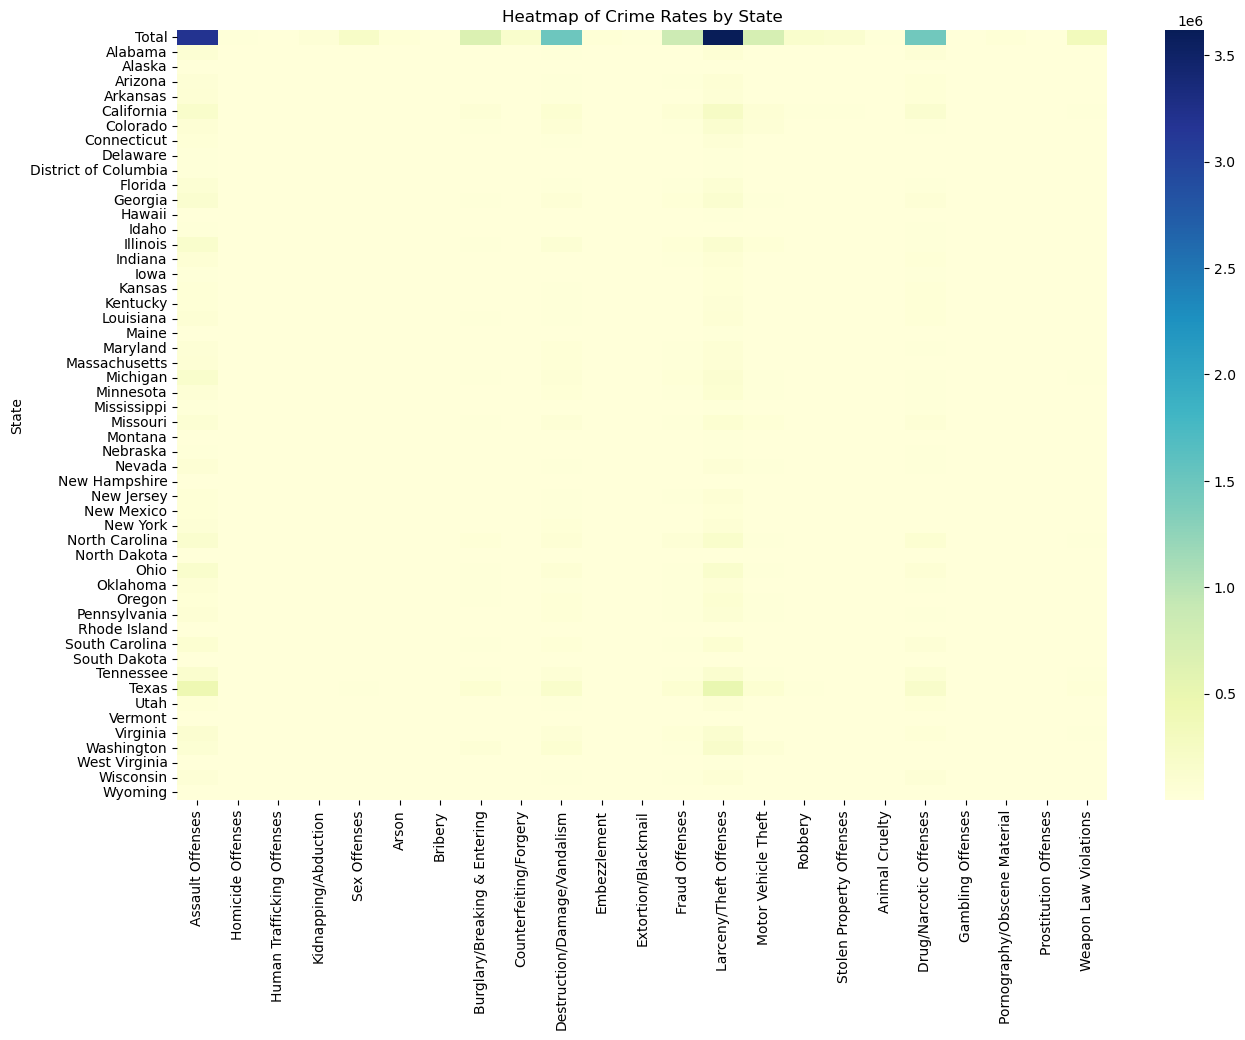

In [17]:
plt.figure(figsize=(15, 10))
crime_rate_pivot = crime_df.set_index('State')[numeric_columns]
sns.heatmap(crime_rate_pivot, cmap="YlGnBu")
plt.title('Heatmap of Crime Rates by State')
plt.show()


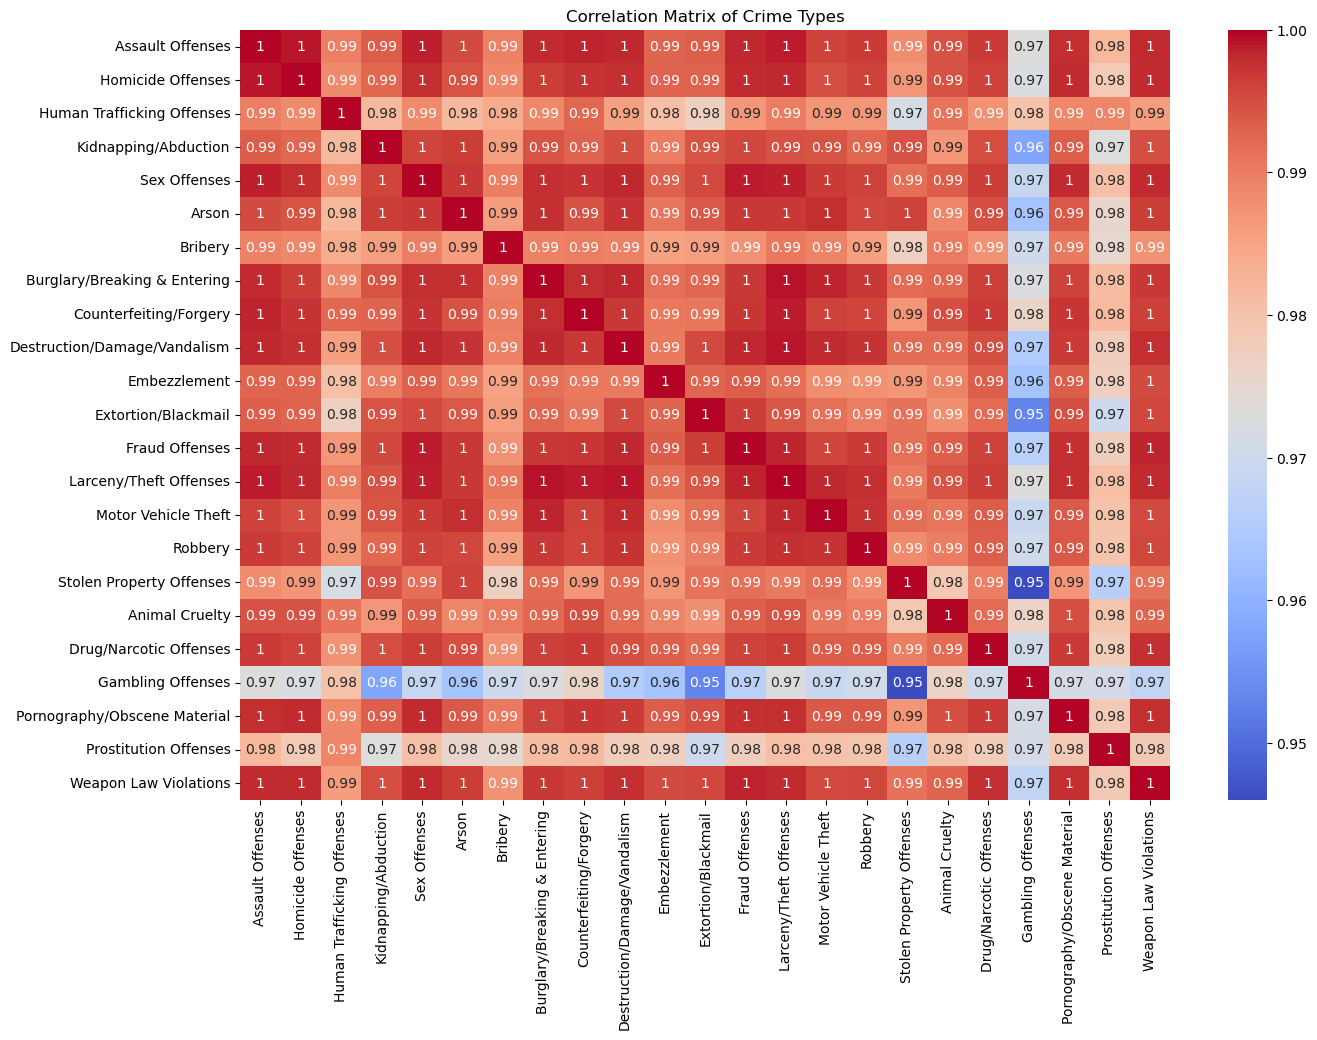

In [18]:
# Calculating correlation matrix
correlation_matrix = crime_df[numeric_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Crime Types')
plt.show()


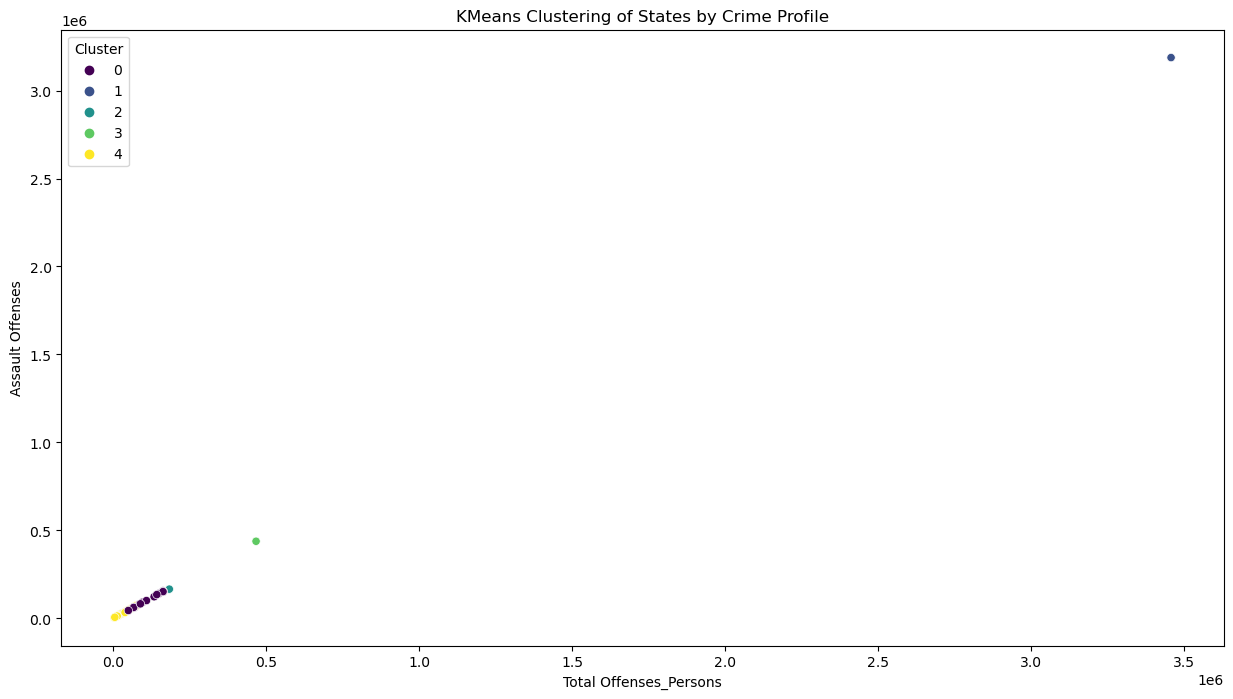

In [21]:
# Standardizing the data
scaler = StandardScaler()
crime_data_scaled = scaler.fit_transform(crime_df[numeric_columns])

# Applying KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
crime_df['Cluster'] = kmeans.fit_predict(crime_data_scaled)

# Visualizing the clusters
plt.figure(figsize=(15, 8))
sns.scatterplot(x=crime_df['Total Offenses_Persons'], y=crime_df['Assault Offenses'], hue=crime_df['Cluster'], palette='viridis')
plt.title('KMeans Clustering of States by Crime Profile')
plt.show()


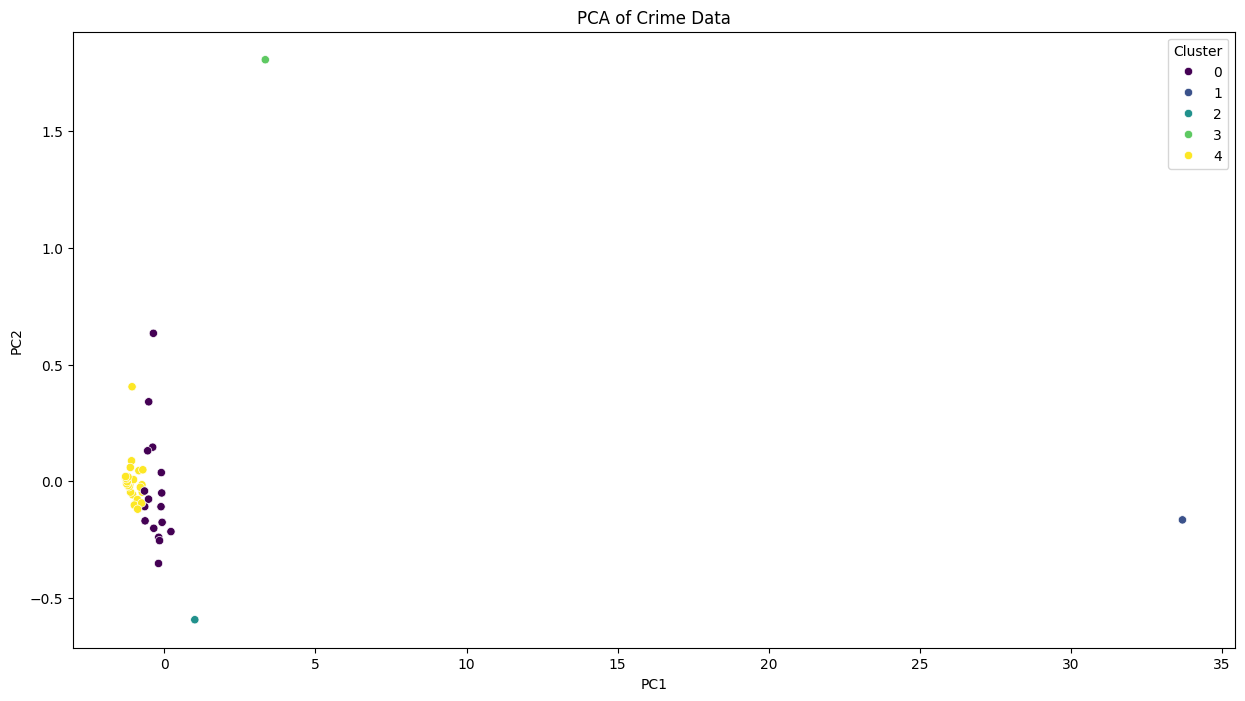

In [23]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(crime_data_scaled)


pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['State'] = crime_df['State']
pca_df['Cluster'] = crime_df['Cluster']

# Visualizing the principal components
plt.figure(figsize=(15, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA of Crime Data')
plt.show()


In [29]:
merged_df = crime_df.merge(poverty_df, on='State', how='outer') \
                    .merge(education_df, on='State', how='outer') \
                    .merge(unemployment_df, on='State', how='outer')
merged_df

,State,Number of Participating Agencies_Persons,Population Covered_Persons,Total Offenses_Persons,Assault Offenses,Homicide Offenses,Human Trafficking Offenses,Kidnapping/Abduction,Sex Offenses,Number of Participating Agencies_Property,...,Some_College_or_Associates_Degree_2017_21,Bachelors_Degree_or_Higher_2017_21,Percent_Less_than_High_School_Diploma_2017_21,Percent_High_School_Diploma_Only_2017_21,Percent_Some_College_or_Associates_Degree_2017_21,Percent_Bachelors_Degree_or_Higher_2017_21,Civilian_Labor_Force_Annual_Avg_2022,Number_Employed_Annual_Avg_2022,Number_Unemployed_Annual_Avg_2022,Unemployment_Rate_2022
0,Total,13293,256187698,3456189,3187575,18785,2691.0,43083,204055,13293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,404,4519862,76654,73898,482,36.0,338,1900,404,...,1032122.0,910425.0,12.597300,30.499973,30.233789,26.668938,2286028.0,2226670.0,59358.0,2.6
2,Alaska,32,444412,6681,5826,45,9.0,41,760,32,...,165649.0,148191.0,6.744470,28.463692,34.198009,30.593829,356799.0,342400.0,14399.0,4.0
3,Arizona,89,4571670,58118,53000,293,82.0,794,3949,89,...,1610633.0,1495416.0,11.695726,23.486986,33.610823,31.206465,3615161.0,3477033.0,138128.0,3.8
4,Arkansas,294,2986257,64358,60242,337,10.0,652,3117,294,...,592568.0,491269.0,12.305063,34.073884,29.316328,24.304726,1369367.0,1323949.0,45418.0,3.3
5,California,559,20450698,184079,165486,762,127.0,4847,12857,559,...,7632443.0,9451438.0,15.807829,20.439376,28.482379,35.270416,19251974.0,18440895.0,811079.0,4.2
6,Colorado,234,5825547,72319,63021,448,64.0,2250,6536,234,...,1139275.0,1686169.0,7.635686,20.598622,28.937349,42.828343,3200625.0,3103531.0,97094.0,3.0
7,Connecticut,107,3626205,31418,29074,168,11.0,335,1830,107,...,613201.0,1019966.0,8.946670,26.119810,24.380421,40.553099,1932463.0,1851993.0,80470.0,4.2
8,Delaware,63,1018396,16578,15790,71,5.0,182,530,63,...,186528.0,232374.0,8.946769,30.397123,27.008853,33.647255,496688.0,474258.0,22430.0,4.5
9,District of Columbia,2,671803,21196,20235,197,31.5,48,716,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Socioeconomic Data Summary
**Poverty Dataset**
Estimate_People_All_Ages_Poverty_2021

Estimate_People_Age_0_17_Poverty_2021

Estimate_Children_Age_5_17_Families_Poverty_2021

Estimate_Median_Household_Income_2021

Estimate_Children_Age_0_4_Poverty_2021




**Education Dataset**

Less_than_High_School_Diploma_2017_21
High_School_Diploma_Only_2017_21
Some_College_or_Associates_Degree_2017_21
Bachelors_Degree_or_Higher_2017_21
Percent_Less_than_High_School_Diploma_2017_21
Percent_High_School_Diploma_Only_2017_21
Percent_Some_College_or_Associates_Degree_2017_21
Percent_Bachelors_Degree_or_Higher_2017_21

**Unemployment Dataset**

Civilian_Labor_Force_Annual_Avg_2022

Number_Employed_Annual_Avg_2022

Number_Unemployed_Annual_Avg_2022

Unemployment_Rate_2022

## Next Steps: Crime and Socioeconomic Data Analysis


Since we had no data for District of Columbia education, unemployment and poverty, I will replace the missing values firstly.

In [30]:
merged_df.replace(0, np.nan, inplace=True)
merged_df.interpolate(inplace=True)
merged_df.bfill(inplace=True)
merged_df.ffill(inplace=True)

In [31]:
merged_df

,State,Number of Participating Agencies_Persons,Population Covered_Persons,Total Offenses_Persons,Assault Offenses,Homicide Offenses,Human Trafficking Offenses,Kidnapping/Abduction,Sex Offenses,Number of Participating Agencies_Property,...,Some_College_or_Associates_Degree_2017_21,Bachelors_Degree_or_Higher_2017_21,Percent_Less_than_High_School_Diploma_2017_21,Percent_High_School_Diploma_Only_2017_21,Percent_Some_College_or_Associates_Degree_2017_21,Percent_Bachelors_Degree_or_Higher_2017_21,Civilian_Labor_Force_Annual_Avg_2022,Number_Employed_Annual_Avg_2022,Number_Unemployed_Annual_Avg_2022,Unemployment_Rate_2022
0,Total,13293,256187698,3456189,3187575,18785,2691.0,43083,204055,13293,...,1032122.0,910425.0,12.597300,30.499973,30.233789,26.668938,2286028.0,2226670.0,59358.0,2.6
1,Alabama,404,4519862,76654,73898,482,36.0,338,1900,404,...,1032122.0,910425.0,12.597300,30.499973,30.233789,26.668938,2286028.0,2226670.0,59358.0,2.6
2,Alaska,32,444412,6681,5826,45,9.0,41,760,32,...,165649.0,148191.0,6.744470,28.463692,34.198009,30.593829,356799.0,342400.0,14399.0,4.0
3,Arizona,89,4571670,58118,53000,293,82.0,794,3949,89,...,1610633.0,1495416.0,11.695726,23.486986,33.610823,31.206465,3615161.0,3477033.0,138128.0,3.8
4,Arkansas,294,2986257,64358,60242,337,10.0,652,3117,294,...,592568.0,491269.0,12.305063,34.073884,29.316328,24.304726,1369367.0,1323949.0,45418.0,3.3
5,California,559,20450698,184079,165486,762,127.0,4847,12857,559,...,7632443.0,9451438.0,15.807829,20.439376,28.482379,35.270416,19251974.0,18440895.0,811079.0,4.2
6,Colorado,234,5825547,72319,63021,448,64.0,2250,6536,234,...,1139275.0,1686169.0,7.635686,20.598622,28.937349,42.828343,3200625.0,3103531.0,97094.0,3.0
7,Connecticut,107,3626205,31418,29074,168,11.0,335,1830,107,...,613201.0,1019966.0,8.946670,26.119810,24.380421,40.553099,1932463.0,1851993.0,80470.0,4.2
8,Delaware,63,1018396,16578,15790,71,5.0,182,530,63,...,186528.0,232374.0,8.946769,30.397123,27.008853,33.647255,496688.0,474258.0,22430.0,4.5
9,District of Columbia,2,671803,21196,20235,197,31.5,48,716,2,...,2365214.0,2536165.0,9.954111,29.150115,28.306088,32.589686,5629497.5,5461649.5,167848.0,3.7


In [32]:
# Check for missing values
missing_values = merged_df.isnull().sum()
print("Missing values in each column:\n", missing_values)
# Check for zero values
zero_values = (merged_df == 0).sum()
print("Zero values in each column:\n", zero_values)

Missing values in each column:
 State                                                0
Number of Participating Agencies_Persons             0
Population Covered_Persons                           0
Total Offenses_Persons                               0
Assault Offenses                                     0
Homicide Offenses                                    0
Human Trafficking Offenses                           0
Kidnapping/Abduction                                 0
Sex Offenses                                         0
Number of Participating Agencies_Property            0
Population Covered_Property                          0
Total Offenses_Property                              0
Arson                                                0
Bribery                                              0
Burglary/Breaking & Entering                         0
Counterfeiting/Forgery                               0
Destruction/Damage/Vandalism                         0
Embezzlement                     

In [33]:
crime_types_stats = merged_df[['Assault Offenses', 'Homicide Offenses', 'Human Trafficking Offenses',
                               'Kidnapping/Abduction', 'Sex Offenses', 'Arson', 'Bribery',
                               'Burglary/Breaking & Entering', 'Counterfeiting/Forgery',
                               'Destruction/Damage/Vandalism', 'Embezzlement', 'Extortion/Blackmail',
                               'Fraud Offenses', 'Larceny/Theft Offenses', 'Motor Vehicle Theft',
                               'Robbery', 'Stolen Property Offenses', 'Animal Cruelty',
                               'Drug/Narcotic Offenses', 'Gambling Offenses', 'Pornography/Obscene Material',
                               'Prostitution Offenses', 'Weapon Law Violations']].describe()
print(crime_types_stats)

       Assault Offenses  Homicide Offenses  Human Trafficking Offenses  \
count      5.200000e+01          52.000000                   52.000000   
mean       1.225990e+05         722.500000                  104.634615   
std        4.387881e+05        2584.316305                  376.775211   
min        3.791000e+03          18.000000                    1.000000   
25%        1.641550e+04          70.000000                   10.750000   
50%        4.555650e+04         248.500000                   31.250000   
75%        7.548750e+04         536.750000                   65.250000   
max        3.187575e+06       18785.000000                 2691.000000   

       Kidnapping/Abduction   Sex Offenses         Arson     Bribery  \
count             52.000000      52.000000     52.000000   52.000000   
mean            1657.038462    7848.269231   1160.230769   25.798077   
std             5931.900562   28013.342226   4152.488593   90.120304   
min               39.000000     317.000000   

In [34]:
merged_df.columns

Index(['State', 'Number of Participating Agencies_Persons',
       'Population Covered_Persons', 'Total Offenses_Persons',
       'Assault Offenses', 'Homicide Offenses', 'Human Trafficking Offenses',
       'Kidnapping/Abduction', 'Sex Offenses',
       'Number of Participating Agencies_Property',
       'Population Covered_Property', 'Total Offenses_Property', 'Arson',
       'Bribery', 'Burglary/Breaking & Entering', 'Counterfeiting/Forgery',
       'Destruction/Damage/Vandalism', 'Embezzlement', 'Extortion/Blackmail',
       'Fraud Offenses', 'Larceny/Theft Offenses', 'Motor Vehicle Theft',
       'Robbery', 'Stolen Property Offenses',
       'Number of Participating Agencies', 'Population Covered',
       'Total Offenses', 'Animal Cruelty', 'Drug/Narcotic Offenses',
       'Gambling Offenses', 'Pornography/Obscene Material',
       'Prostitution Offenses', 'Weapon Law Violations', 'Cluster',
       'Estimate_People_All_Ages_Poverty_2021',
       'Estimate_People_Age_0_17_Poverty_2

**First, I want to see the visualization of which states has more educated person and which states has more income density.**

**So I will sort the data by the percentage of adults with a bachelor's degree or higher**


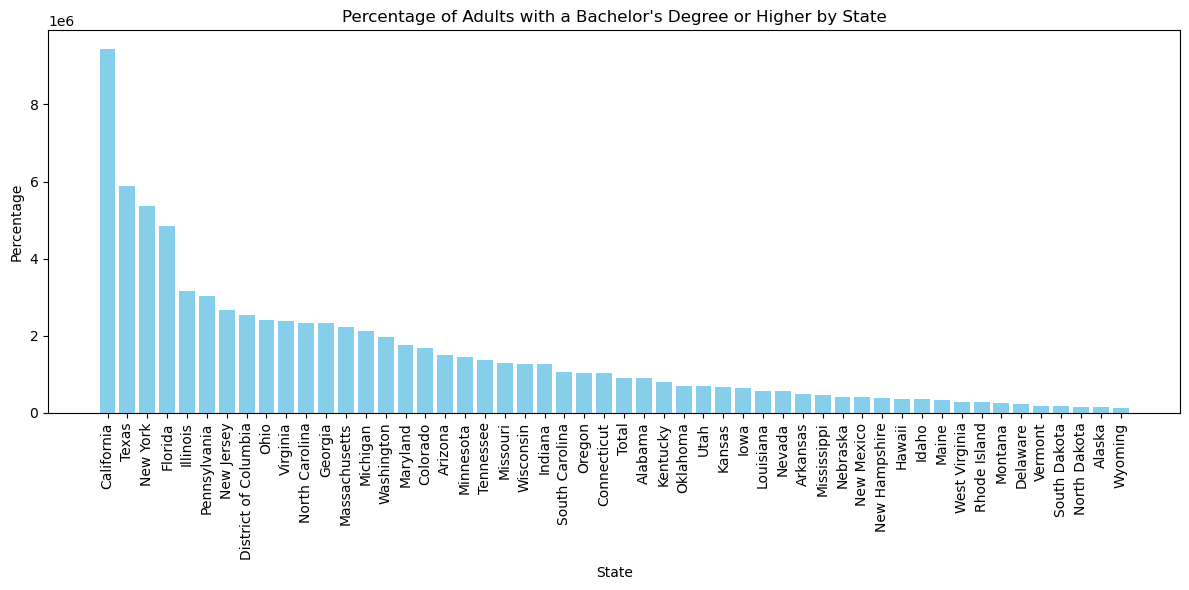

In [35]:
sorted_education_df = merged_df[['State', 'Bachelors_Degree_or_Higher_2017_21']].sort_values(by='Bachelors_Degree_or_Higher_2017_21', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(sorted_education_df['State'], sorted_education_df['Bachelors_Degree_or_Higher_2017_21'], color='skyblue')
plt.title('Percentage of Adults with a Bachelor\'s Degree or Higher by State')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



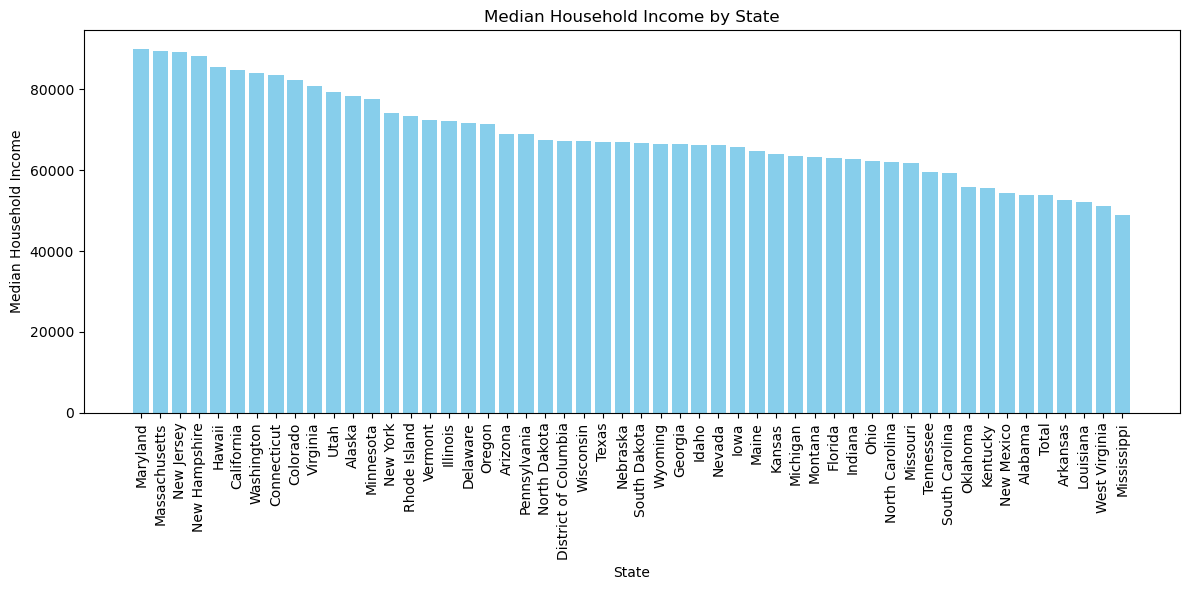

In [36]:
sorted_income_df = merged_df[['State', 'Estimate_Median_Household_Income_2021']].sort_values(by='Estimate_Median_Household_Income_2021', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(sorted_income_df['State'], sorted_income_df['Estimate_Median_Household_Income_2021'], color='skyblue')
plt.title('Median Household Income by State')
plt.xlabel('State')
plt.ylabel('Median Household Income')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


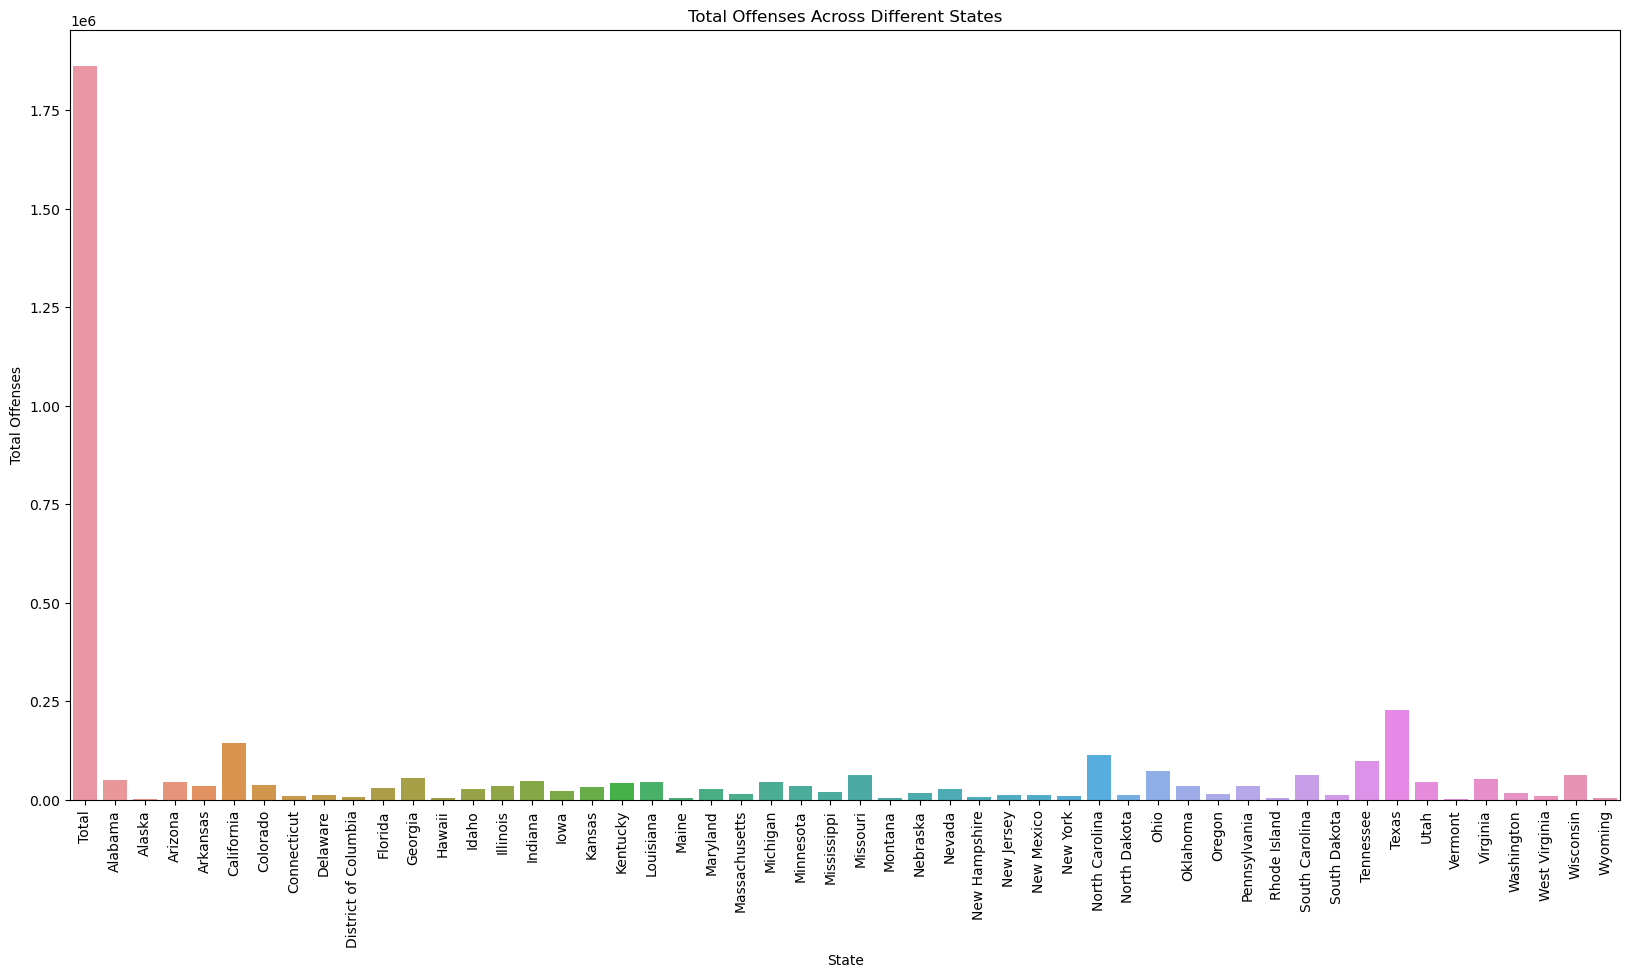

In [43]:
plt.figure(figsize=(20, 10))
sns.barplot(x='State', y='Total Offenses', data=merged_df)
plt.title('Total Offenses Across Different States')
plt.xlabel('State')
plt.ylabel('Total Offenses')
plt.xticks(rotation=90)
plt.show()


## OLS

#### I will do an OLS Regression to understand the relationship between crime rates and socio-economic factors

In [45]:
X = merged_df[['Unemployment_Rate_2022', 'Percent_Less_than_High_School_Diploma_2017_21', 'Estimate_Median_Household_Income_2021']]
y = merged_df['Total Offenses']


X = sm.add_constant(X)


ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:         Total Offenses   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     2.345
Date:                Tue, 28 May 2024   Prob (F-statistic):             0.0846
Time:                        23:08:47   Log-Likelihood:                -717.29
No. Observations:                  52   AIC:                             1443.
Df Residuals:                      48   BIC:                             1450.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

**The OLS regression results show that low R-squared value of 0.128, suggesting that only 12.8% of the variance in the total offenses is explained by the independent variables (unemployment rate, percentage of people with less than a high school diploma, and median household income). The adjusted R-squared is 0.073, further indicating limited explanatory power.**

**Among the independent variables, the percentage of people with less than a high school diploma shows a near-significant positive relationship with total offenses (p = 0.053), implying that higher percentages of low educational attainment are associated with higher crime rates. The unemployment rate has a negative coefficient but is not statistically significant (p = 0.092).**


### KMEANS 

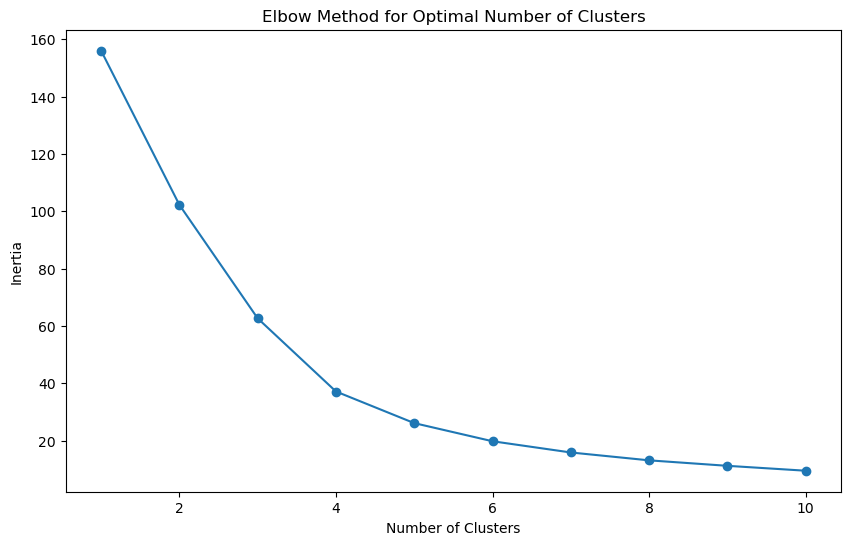

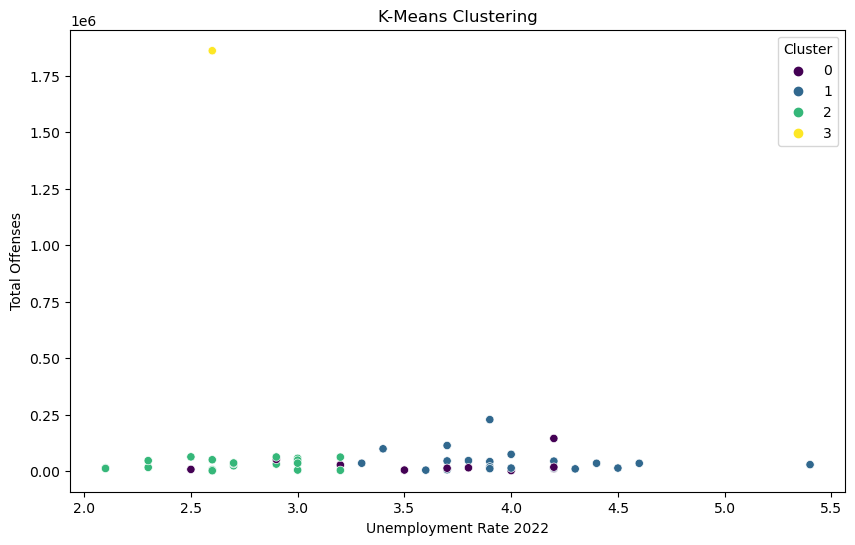

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(merged_df[['Total Offenses', 'Unemployment_Rate_2022', 'Estimate_Median_Household_Income_2021']])

inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

optimal_clusters = 4  # Example: assuming 4 clusters from the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment_Rate_2022', y='Total Offenses', hue='Cluster', data=merged_df, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Unemployment Rate 2022')
plt.ylabel('Total Offenses')
plt.show()


**The clustering reveals distinct groups of states based on their unemployment rates and crime rates.
The majority of states are grouped in clusters with lower total offenses, while a few states (such as the outlier in Cluster 3) have significantly higher crime rates.**

### Decision Tree and Random Forest

Decision Tree Accuracy: 0.0
Random Forest Accuracy: 0.0


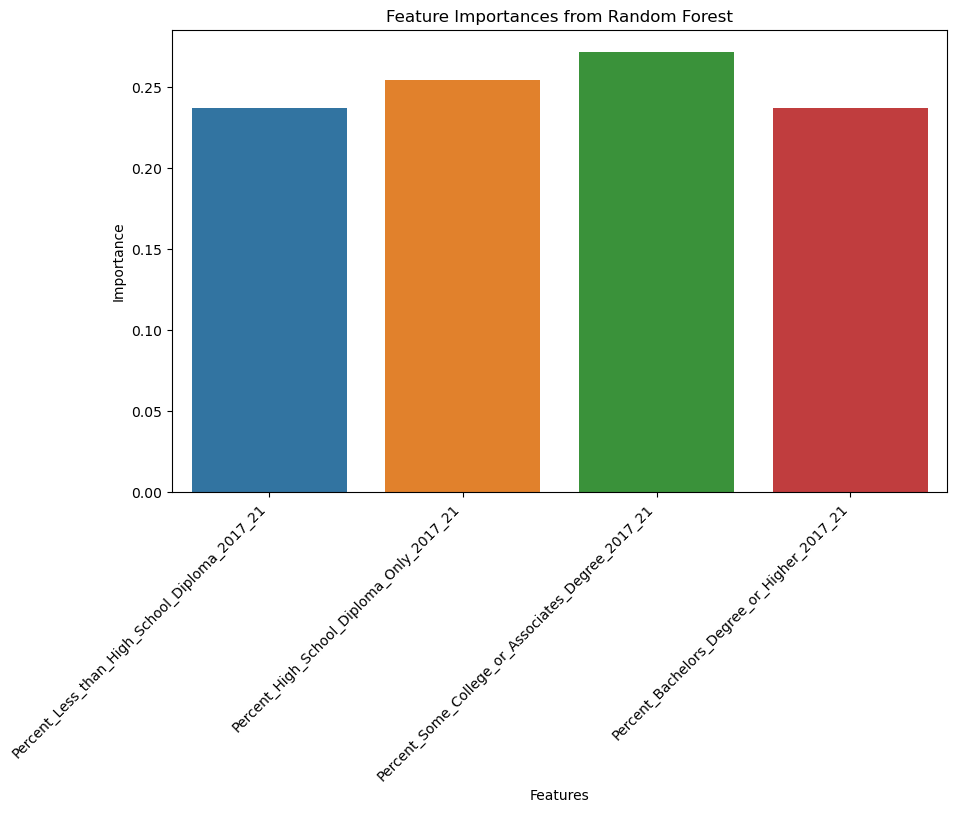

In [52]:
X = merged_df[['Percent_Less_than_High_School_Diploma_2017_21', 'Percent_High_School_Diploma_Only_2017_21',
               'Percent_Some_College_or_Associates_Degree_2017_21', 'Percent_Bachelors_Degree_or_Higher_2017_21']]
y = merged_df['Total Offenses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy}")

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}")



features = ['Percent_Less_than_High_School_Diploma_2017_21', 'Percent_High_School_Diploma_Only_2017_21',
            'Percent_Some_College_or_Associates_Degree_2017_21', 'Percent_Bachelors_Degree_or_Higher_2017_21']
feature_importances = random_forest.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=feature_importances)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()



**The bar plot shows the importance of various educational attainment levels in predicting total offenses using the Random Forest model. Higher importance scores indicate a greater influence on the prediction of crime rates.**

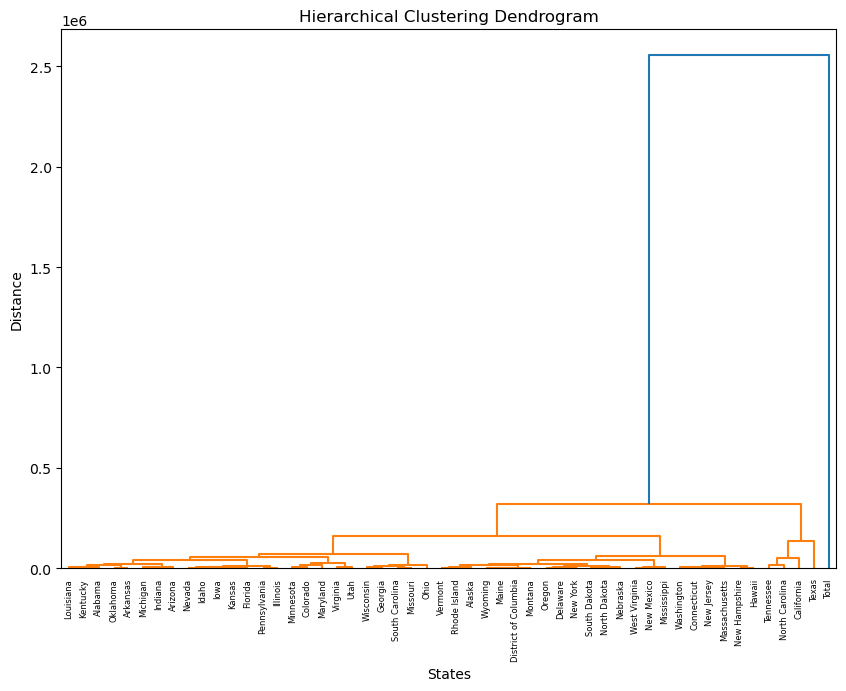

In [50]:
# Hierarchical Clustering to group demographic segments
from scipy.cluster.hierarchy import dendrogram, linkage

X = merged_df[['Total Offenses', 'Unemployment_Rate_2022', 'Estimate_Median_Household_Income_2021']]
linked = linkage(X, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=merged_df['State'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('States')
plt.ylabel('Distance')
plt.show()


### For the Naive Bayes model, we'll use it to classify whether the total offenses are above or below the median value.

In [59]:
X = merged_df[['Estimate_People_All_Ages_Poverty_2021', 'Estimate_Median_Household_Income_2021', 'Unemployment_Rate_2022']]
y = (merged_df['Total Offenses'] > merged_df['Total Offenses'].median()).astype(int)  # Binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)

nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(f"Naive Bayes Precision: {nb_precision}")
print(f"Naive Bayes Recall: {nb_recall}")
print(f"Naive Bayes F1 Score: {nb_f1}")



Naive Bayes Accuracy: 0.4375
Naive Bayes Precision: 1.0
Naive Bayes Recall: 0.25
Naive Bayes F1 Score: 0.4


These results show that Naive Bayes model is highly precise when it predicts a high crime rate but it fails to recall most of the actual high crime rate instances, leading to a low F1 Score.

**Representing crime types on a network graph, we can see the connections clearly for better understanding.**

#### Nodes

Each node represents a different type of crime, such as "Assault Offenses," "Homicide Offenses," "Human Trafficking Offenses," etc.

The size and color of the nodes can be adjusted for better visualization.

#### Edges

Edges between nodes represent the correlation between the corresponding crime types.
The thickness of the edges might represent the strength of the correlation, but in this case, they are uniformly styled.

Correlation values are displayed on the edges. High values indicate a strong positive correlation between the crime types.

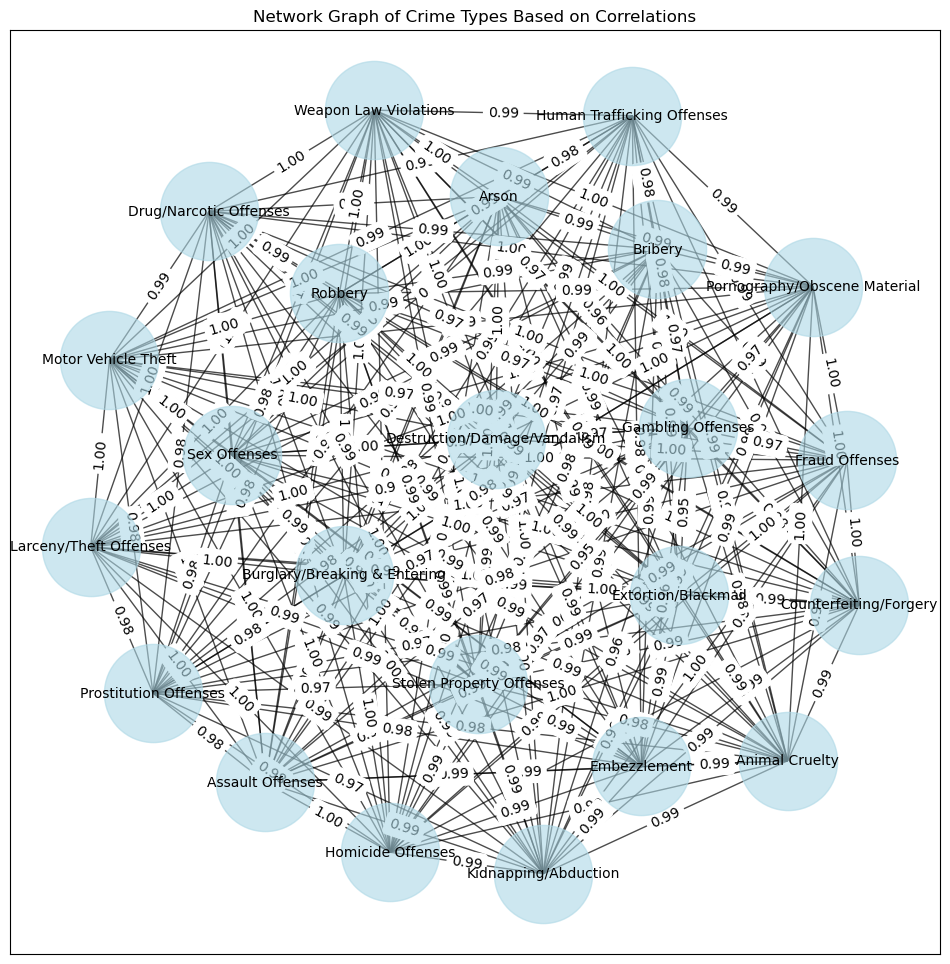

In [60]:
crime_columns = [
    'Assault Offenses', 'Homicide Offenses', 'Human Trafficking Offenses', 
    'Kidnapping/Abduction', 'Sex Offenses', 'Arson', 'Bribery', 
    'Burglary/Breaking & Entering', 'Counterfeiting/Forgery', 
    'Destruction/Damage/Vandalism', 'Embezzlement', 'Extortion/Blackmail', 
    'Fraud Offenses', 'Larceny/Theft Offenses', 'Motor Vehicle Theft', 
    'Robbery', 'Stolen Property Offenses', 'Animal Cruelty', 
    'Drug/Narcotic Offenses', 'Gambling Offenses', 'Pornography/Obscene Material', 
    'Prostitution Offenses', 'Weapon Law Violations'
]


correlation_matrix = merged_df[crime_columns].corr()


G = nx.Graph()


for i, crime1 in enumerate(crime_columns):
    for j, crime2 in enumerate(crime_columns):
        if i != j:
            weight = correlation_matrix.iloc[i, j]
            if weight > 0.3:  
                G.add_edge(crime1, crime2, weight=weight)

pos = nx.spring_layout(G, k=0.15)  
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=5000, node_color='lightblue', alpha=0.6)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): f'{w:.2f}' for i, j, w in G.edges(data='weight')})

plt.title('Network Graph of Crime Types Based on Correlations')
plt.show()


**Strong Relationships:**

Crime types that are highly correlated shows similar patterns. For instance, if "Larceny/Theft Offenses" and "Motor Vehicle Theft" have a high correlation, areas with high rates of one are likely to have high rates of the other.



## Conclusion

The project showed me that while socioeconomic factors like unemployment rate, education levels, and median household income have some impact on crime rates, they do not fully explain the variability in crime rates across different states. The models tested, including OLS regression, decision tree, random forest etc. all showed that predicting crime rates is a multifaceted problem with many contributing factors.

The relatively small size of the dataset limits the generalizability of the findings. With such a small dataset, it is challenging to capture the full complexity and variability of the relationships between socioeconomic factors and crime rates. A larger dataset would probably provide me more reliable insights and improve the performance of the predictive models.

Additionally, incorporating more parameters into the analysis could enhance the predictive power of the models such as the psychological situation of individuals, social services, community programs, law enforcement practices, and environmental factors could offer a more comprehensive understanding of crime rates. Including these variables probably result in more accurate and insightful models, helping to better capture the multifaceted nature of crime and its underlying causes.